In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.shape

(150, 5)

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

Data Visualization


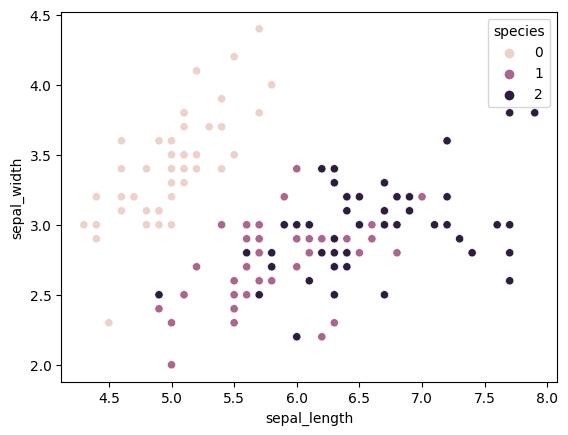

In [7]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species");

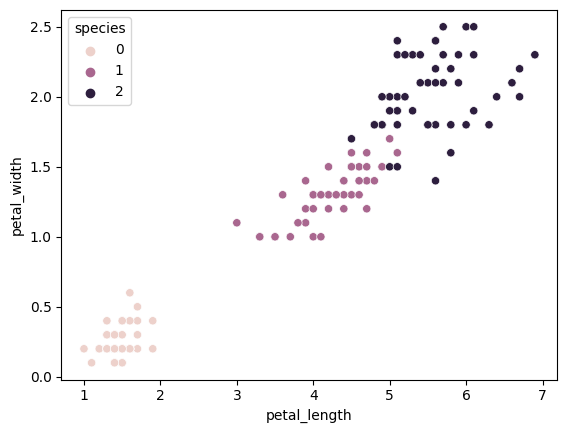

In [8]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species");

In [19]:
# forming X and Y

X=df.drop('species',axis=1)
y=df['species']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
# train-test split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=101, stratify=y)
print(f'''X Train: {X_train.shape}
X Test: {X_test.shape}
y Train: {y_train.shape}
y Train: {y_train.shape}
y Test: {y_test.shape}''')

X Train: (120, 4)
X Test: (30, 4)
y Train: (120,)
y Train: (120,)
y Test: (30,)


In [25]:
# scaling
preprocess=Pipeline([
    ('scaler',StandardScaler())
])

#model
model=Pipeline([
    ('preprocess',preprocess),
    ('classifier',LogisticRegression(multi_class='multinomial'))
])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [26]:
# prediction
y_pred=model.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 2, 0, 2, 2])

Text(0.5, 1.0, 'Confusion Matrix for the Classfication')

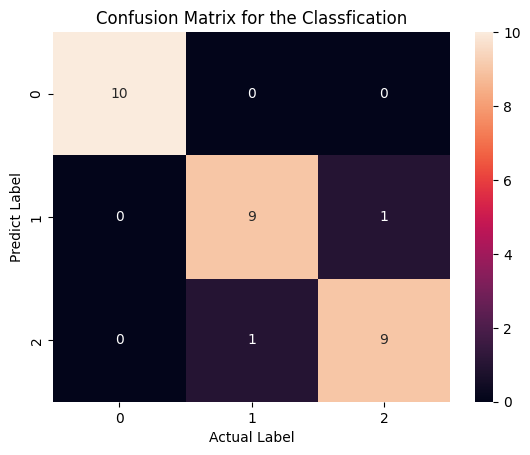

In [27]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Label')
plt.ylabel('Predict Label')
plt.title('Confusion Matrix for the Classfication')

In [28]:
# classification

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

